In [1]:
# Load
import matplotlib.pyplot as plt
import pandas as pd

raw_ohlcv = pd.read_csv("./data/ohlcv.csv", index_col=0, low_memory=False)

multi_ohlcv = raw_ohlcv.copy()

_stock_code = raw_ohlcv["stock_code"].sample(1).iloc[0]
single_ohlcv = raw_ohlcv[raw_ohlcv["stock_code"] == _stock_code].copy()
single_ohlcv.index = pd.to_datetime(single_ohlcv.index)

In [2]:
prices = single_ohlcv["close"]

In [3]:
from ta_tools.models.relative_strength import SimpleRelativeStrengthModel

In [4]:
RS_CFG = {"window": 30}
simple_relative_strength_model = SimpleRelativeStrengthModel(prices, RS_CFG)

srs_indicator = simple_relative_strength_model.indicator()
srs_signal = simple_relative_strength_model.signal(srs_indicator, continious=True, trend=False)

In [5]:
srs_signal

,price,rsi,signal
date,,,
2019-01-21,7104,NaN,NaN
2019-01-22,6988,NaN,NaN
2019-01-23,6988,NaN,NaN
2019-01-24,6957,NaN,NaN
2019-01-25,6988,NaN,NaN
...,...,...,...
2024-01-11,7100,52.920423,-0.058408
2024-01-12,7010,47.880501,0.042390
2024-01-15,6990,57.101589,-0.142032


In [6]:
import matplotlib.gridspec as gridspec



class RelativeStrengthVisualizer:
    @staticmethod
    def draw_signal(fig, signal):
        ax = fig.gca()
        buy_signals = signal["signal"][0 < signal["signal"]]
        ax.scatter(
            buy_signals.index,
            signal.loc[buy_signals.index, "price"],
            s=buy_signals * 100,
            color="r",
            alpha=abs(buy_signals.values) * 1,
        )

        sell_signals = signal["signal"][signal["signal"] < 0]
        ax.scatter(
            sell_signals.index,
            signal.loc[sell_signals.index, "price"],
            s=abs(sell_signals) * 100,
            color="b",
            alpha=abs(sell_signals.values) * 1,
        )
        return fig

    @staticmethod
    def draw_price(fig, signal):
        gs = gridspec.GridSpec(3, 1, figure=fig)
        ax = fig.add_subplot(gs[:2, :])
        ax.plot(signal.index, signal["price"], color="k", linewidth=0.5)
        return fig

    
    @staticmethod
    def draw_rsi(fig, signal):
        gs = gridspec.GridSpec(3, 1, figure=fig)
        ax_2 = fig.add_subplot(gs[2, :])  # RSI 그래프는 1/3의 공간을 차지합니다.
        ax_2.plot(signal.index, signal['rsi'], color='purple', label='RSI')
        ax_2.axhline(70, linestyle='--', color='red', label='Overbought')
        ax_2.axhline(30, linestyle='--', color='green', label='Oversold')
        ax_2.set_title('Relative Strength Index (RSI)')
        ax_2.legend()

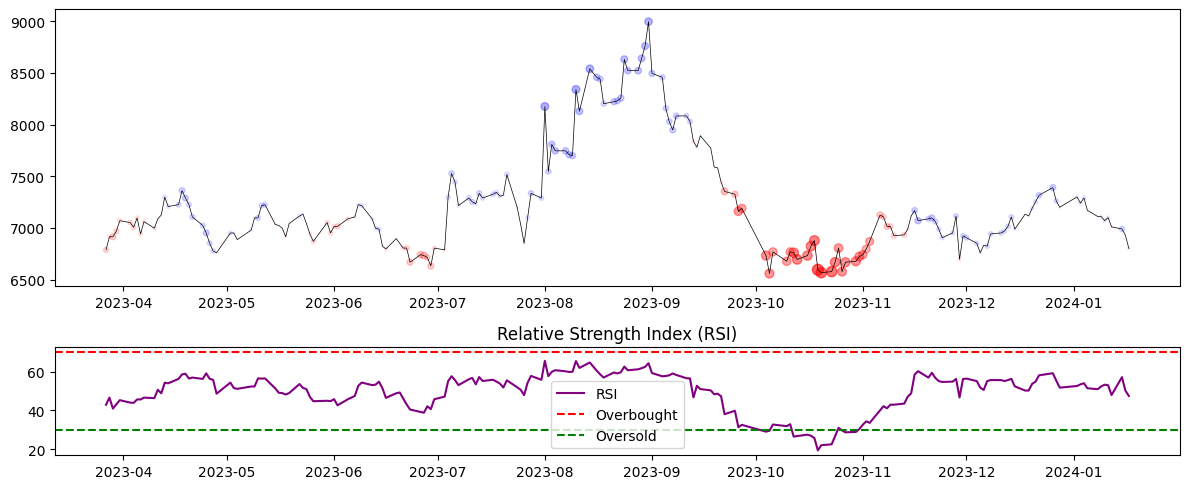

In [8]:
fig = plt.figure(figsize=(12, 5))

fig = RelativeStrengthVisualizer.draw_price(fig, srs_signal.tail(200))
fig = RelativeStrengthVisualizer.draw_signal(fig, srs_signal.tail(200))
fig = RelativeStrengthVisualizer.draw_rsi(fig, srs_signal.tail(200))

plt.tight_layout()